In [128]:
import pandas as pd
import os
import openpyxl
import matplotlib.pyplot as plt

In [129]:
# pre pandemic file
file_path = "2019-29/education.xlsx"
# post pandemic file
file_path2 = "2023-33/education.xlsx"
# prepandemic workbook
pre_pandemic_data = openpyxl.load_workbook(file_path)
#postpandemic workbook
post_pandemic_data = openpyxl.load_workbook(file_path2)

In [130]:
#table_5_1_19 = pre_pandemic_data["Table 5.1"] # does not exist
table_5_2_19 = pre_pandemic_data["Table 5.2"]
table_5_3_19 = pre_pandemic_data["Table 5.3"]
table_5_4_19 = pre_pandemic_data["Table 5.4"]

table_5_1_23 = post_pandemic_data["Table 5.1"]
table_5_2_23 = post_pandemic_data["Table 5.2"]
table_5_3_23 = post_pandemic_data["Table 5.3"]
table_5_4_23 = post_pandemic_data["Table 5.4"]

In [131]:
# The code provided defines two functions:
# # # Function to get and display column names
# # def get_column_names(df):
# #     print("Column Names:")
# #     column_names = df.columns.tolist()
# #     print(column_names)
# #     return column_names

# # # Function to get and display rows of a specific column
# # def get_specific_column_rows(df, column_name, num_rows=5):
# #     if column_name not in df.columns:
# #         print(f"Error: Column '{column_name}' not found in the DataFrame.")
# #         return
# #     print(f"\nRows for Column '{column_name}':")
# #     print(df[column_name].head(num_rows))


In [132]:
# def preprocess_table_and_title(df):
#     # Extract the title from the first row
#     table_title = df.iloc[0,0]  # Assuming the title is in the first cell
#     print(f"Table Title: {table_title}")

#     # Set the second row as column headers
#     df.columns = df.iloc[1]  # Use the second row as column headers
#     df = df[2:].reset_index(drop=True)  # Drop the first two rows
#     return table_title, df

# # Preprocess the tables (if necessary)
# table_5_1 = preprocess_table_and_title(table_5_1)

In [133]:
def processTable(sheet):
    # Output the title from the first row (index 0)
    table_title = sheet[1][0].value  # First row, first column is the title
    print(f"Table Title: {table_title}")

    # Output the column names from the second row (index 1)
    column_names = [cell.value for cell in sheet[2]]  # Second row for column names
    print("Column Names:")
    print(column_names)

    # Output the data starting from the third row (index 2)
    #print("\nRow Data:")
    for row in sheet.iter_rows(min_row=3, max_row=sheet.max_row, min_col=1, max_col=sheet.max_column):
        row_values = [cell.value for cell in row]
        #print(row_values)

# Process Table 5.1
processTable(table_5_1_23)

Table Title: Table 5.1 Unemployment rates and earnings by educational attainment, 2023
Column Names:
['Educational attainment', 'Median usual weekly earnings ($)', 'Unemployment rate (%)']


In [134]:
# Function to process and extract relevant rows
def extract_employment_data(sheet):
    data = []
    for row in sheet.iter_rows(min_row=1, max_row=sheet.max_row, min_col=1, max_col=sheet.max_column):
        row_values = [cell.value for cell in row]
        # Skip metadata rows
        if (
            not row_values[0] or  # Skip rows with no label
            row_values[0].startswith("Table") or  # Skip title row
            #row_values[0] == "Educational attainment" or  # Skip header row
            row_values[0].startswith("Note:") or  # Skip notes
            row_values[0].startswith("Source:")  # Skip source
        ):
            continue
        # Ensure all data rows have meaningful values
        if row_values[1] is not None:
            data.append(row_values)
    return data

# Extract relevant data
processed_data = extract_employment_data(table_5_1_23)

# Remove "Total, all occupations"
filtered_data = [row for row in processed_data if row[0] != "Total"]

In [135]:
#filtered_data

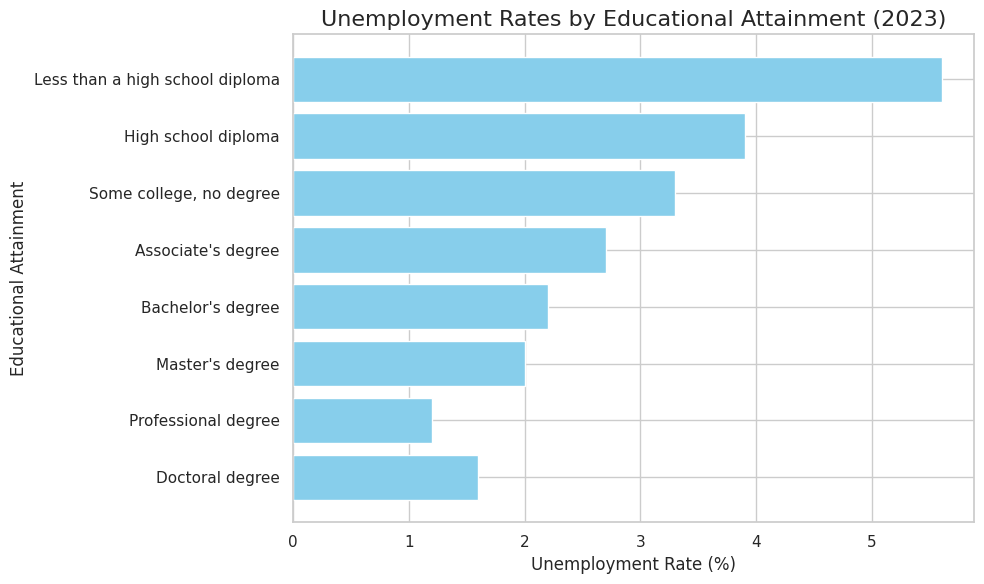

In [136]:
import seaborn as sns

columns = filtered_data[0]  # The first row contains column names
data = filtered_data[1:]    # The remaining rows are the actual data

df_table_5_1 = pd.DataFrame(data, columns=columns)

sns.set(style="whitegrid")

education = df_table_5_1['Educational attainment']
unemployment_rate = df_table_5_1['Unemployment rate (%)']

# Create the plot
plt.figure(figsize=(10, 6))
plt.barh(education, unemployment_rate, color='skyblue')

# Add title and labels
plt.title("Unemployment Rates by Educational Attainment (2023)", fontsize=16)
plt.xlabel("Unemployment Rate (%)", fontsize=12)
plt.ylabel("Educational Attainment", fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()


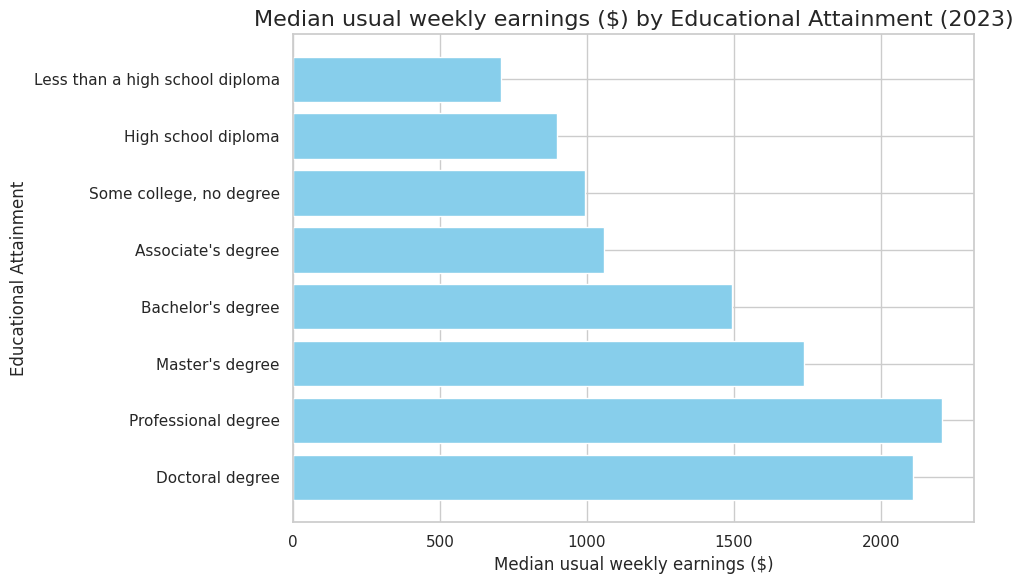

In [137]:
df_table_5_1 = pd.DataFrame(data, columns=columns)

sns.set(style="whitegrid")

education = df_table_5_1['Educational attainment']
unemployment_rate = df_table_5_1['Median usual weekly earnings ($)']

# Create the plot
plt.figure(figsize=(10, 6))
plt.barh(education, unemployment_rate, color='skyblue')

# Add title and labels
plt.title("Median usual weekly earnings ($) by Educational Attainment (2023)", fontsize=16)
plt.xlabel("Median usual weekly earnings ($)", fontsize=12)
plt.ylabel("Educational Attainment", fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()

In [138]:
processTable(table_5_2_19)
processTable(table_5_2_23)

Table Title: Table 5.2 Employment, wages, and projected change in employment by typical entry-level education 
(Employment in thousands)
Column Names:
['Typical entry-level education', 'Employment, 2019', 'Employment distribution, percent, 2019', 'Employment change, percent, 2019-29', 'Median annual wage, 2020(1)']
Table Title: Table 5.2 Employment, wages, and projected change in employment by typical entry-level education (Employment in thousands)
Column Names:
['Typical entry-level education', 'Employment, 2023', 'Employment, 2033', 'Employment distribution, percent, 2023', 'Employment distribution, percent, 2033', 'Numeric employment change, 2023-33', 'Percent employment change, 2023-33', 'Median annual wage, dollars, 2023[1]']


In [139]:
def extract_table5_2_data_a(sheet):
    data = []
    for row in sheet.iter_rows(min_row=1, max_row=sheet.max_row, min_col=1, max_col=sheet.max_column):
        row_values = [cell.value for cell in row]
        # Skip metadata rows
        if (
            not row_values[0] or  # Skip rows with no label
            row_values[0].startswith("Table") or  # Skip title row
            row_values[0] in ("Footnotes:", "[1]") or  # Skip footnote rows
            row_values[0].startswith("Note:") or  # Skip notes
            row_values[0].startswith("Source:")  # Skip source
        ):
            continue
        # Ensure all data rows have meaningful values
        if row_values[1] is not None:
            data.append(row_values)
    return data

In [140]:
def extract_table5_2_data_b(sheet):
    data = []
    for row in sheet.iter_rows(min_row=1, max_row=sheet.max_row, min_col=1, max_col=sheet.max_column):
        row_values = [cell.value for cell in row]
        # Skip metadata rows
        if (
            not row_values[0] or  # Skip rows with no label
            row_values[0].startswith("Table") or  # Skip title row
            row_values[0] in ("Footnotes:", "[1]") or  # Skip footnote rows
            row_values[0].startswith("Note:") or  # Skip notes
            row_values[0].startswith("Source:")  # Skip source
        ):
            continue
        # Ensure all data rows have meaningful values
        if row_values[1] is not None:
            data.append(row_values)
    return data

In [141]:
# Extract relevant data
processed_data2a = extract_table5_2_data_a(table_5_2_19)

# Remove "Total, all occupations"
filtered_data2a = [row for row in processed_data2a if row[0] != "Total, all occupations"]

In [142]:
# Extract relevant data
processed_data2b = extract_table5_2_data_b(table_5_2_23)

# Remove "Total, all occupations"
filtered_data2b = [row for row in processed_data2b if row[0] != "Total, all occupations"]

In [162]:
#filtered_data2a
#filtered_data2b

In [163]:
columns2a = filtered_data2a[0]  # The first row contains column names
data2a = filtered_data2a[1:]    # The remaining rows are the actual data

df_table_5_2a = pd.DataFrame(data2a, columns=columns2a)

In [164]:
columns2b = filtered_data2b[0]  # The first row contains column names
data2b = filtered_data2b[1:]    # The remaining rows are the actual data

df_table_5_2b = pd.DataFrame(data2b, columns=columns2b)


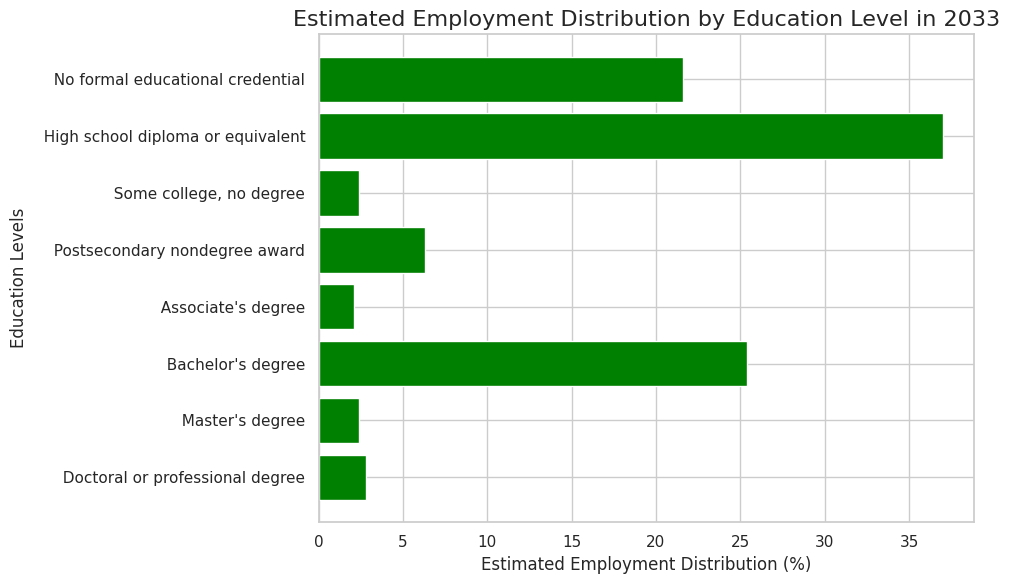

In [165]:
import seaborn as sns

sns.set(style="whitegrid")

education = df_table_5_2b['Typical entry-level education']
empl_distb_2033 = df_table_5_2b['Employment distribution, percent, 2033']

# Create the plot
plt.figure(figsize=(10, 6))
plt.barh(education, empl_distb_2033, color='green')

# Add title and labels
plt.title("Estimated Employment Distribution by Education Level in 2033", fontsize=16)
plt.ylabel("Education Levels", fontsize=12)
plt.xlabel("Estimated Employment Distribution (%)", fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()

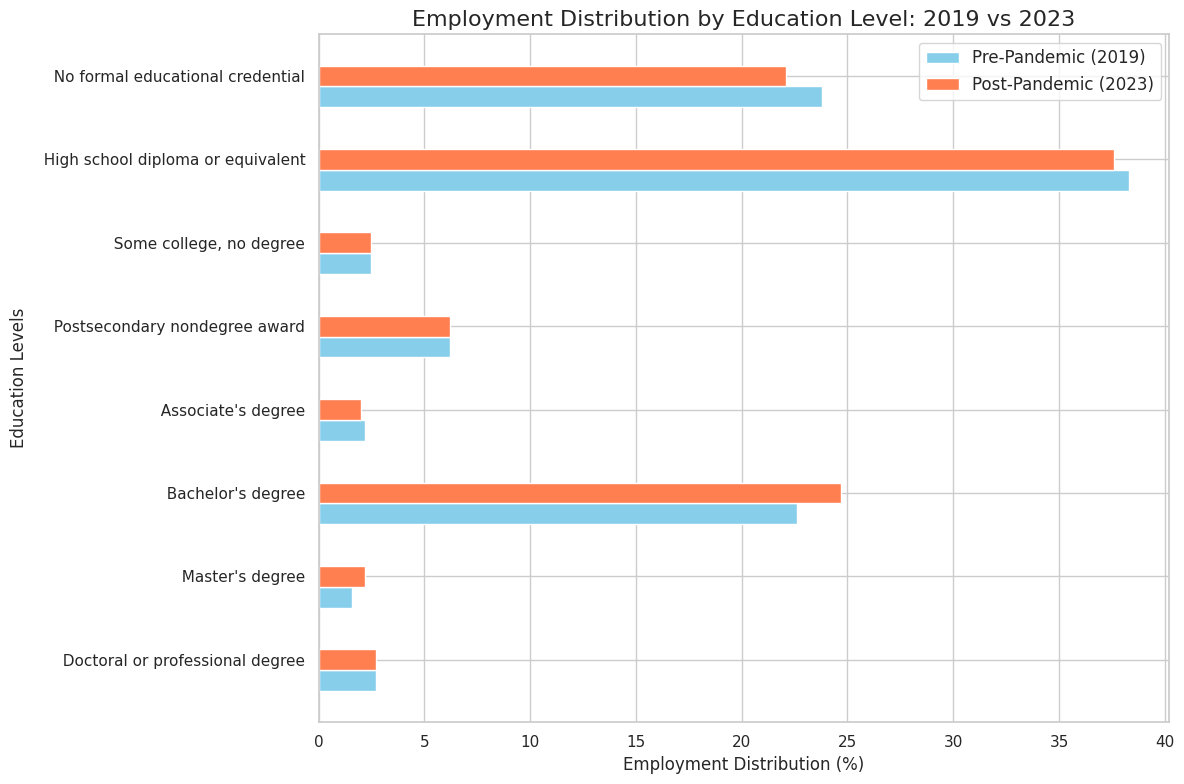

In [147]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

sns.set(style="whitegrid")

education_levels = df_table_5_2b['Typical entry-level education']  # Shared education levels
pre_pandemic_data = df_table_5_2a['Employment distribution, percent, 2019']
post_pandemic_data = df_table_5_2b['Employment distribution, percent, 2023']

# Set the width of the bars
bar_width = 0.25

# Set the positions of the bars on the x-axis
x_pos = np.arange(len(education_levels))
x_pos_pre = x_pos - bar_width
x_pos_post = x_pos
x_pos_2033 = x_pos + bar_width

# Create the plot
plt.figure(figsize=(12, 8))

# Plot pre-pandemic bars
plt.barh(x_pos_pre, pre_pandemic_data, bar_width, color='skyblue', label='Pre-Pandemic (2019)')

# Plot post-pandemic bars
plt.barh(x_pos_post, post_pandemic_data, bar_width, color='coral', label='Post-Pandemic (2023)')

# Customize the plot
plt.title("Employment Distribution by Education Level: 2019 vs 2023", fontsize=16)
plt.xlabel("Employment Distribution (%)", fontsize=12)
plt.ylabel("Education Levels", fontsize=12)
plt.yticks(x_pos, education_levels)  # Set y-axis labels
plt.legend(loc='best', fontsize=12)  # Add a legend

# Show the plot
plt.tight_layout()
plt.show()


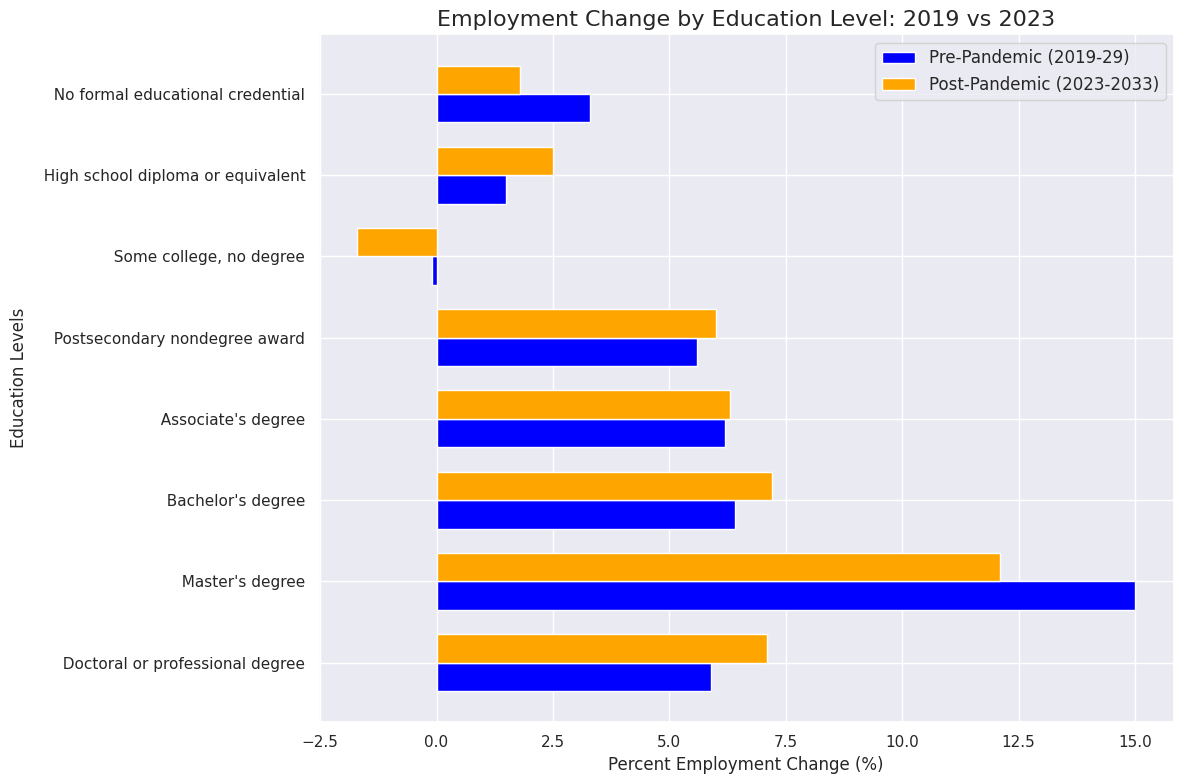

In [148]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

sns.set(style="darkgrid")

# Assuming df_table_5_2a and df_table_5_2b are your DataFrames
# Strip any leading/trailing whitespace in column headers
df_table_5_2a.columns = df_table_5_2a.columns.str.strip()
df_table_5_2b.columns = df_table_5_2b.columns.str.strip()

# DEBUG inspect column names to ensure correct headers
#print("Columns in df_table_5_2a:", df_table_5_2a.columns)
#print("Columns in df_table_5_2b:", df_table_5_2b.columns)

# Correctly match column names
education_levels = df_table_5_2b['Typical entry-level education']
empl_change_2019_29 = df_table_5_2a['Employment change, percent, 2019-29']
empl_change_2023_33 = df_table_5_2b['Percent employment change, 2023-33']

# Set the width of the bars
bar_width = 0.35

# Set the positions of the bars on the x-axis
x_pos = np.arange(len(education_levels))
x_pos_2019 = x_pos - bar_width / 2
x_pos_2023 = x_pos + bar_width / 2

# Create the plot
plt.figure(figsize=(12, 8))

# Plot employment change for 2019-2029
plt.barh(x_pos_2019, empl_change_2019_29, bar_width, color='blue', label='Pre-Pandemic (2019-29)')

# Plot employment change for 2023-2033
plt.barh(x_pos_2023, empl_change_2023_33, bar_width, color='orange', label='Post-Pandemic (2023-2033)')

# Customize the plot
plt.title("Employment Change by Education Level: 2019 vs 2023", fontsize=16)
plt.xlabel("Percent Employment Change (%)", fontsize=12)
plt.ylabel("Education Levels", fontsize=12)
plt.yticks(x_pos, education_levels)  # Set y-axis labels
plt.legend(loc='best', fontsize=12)  # Add a legend

# Show the plot
plt.tight_layout()
plt.show()


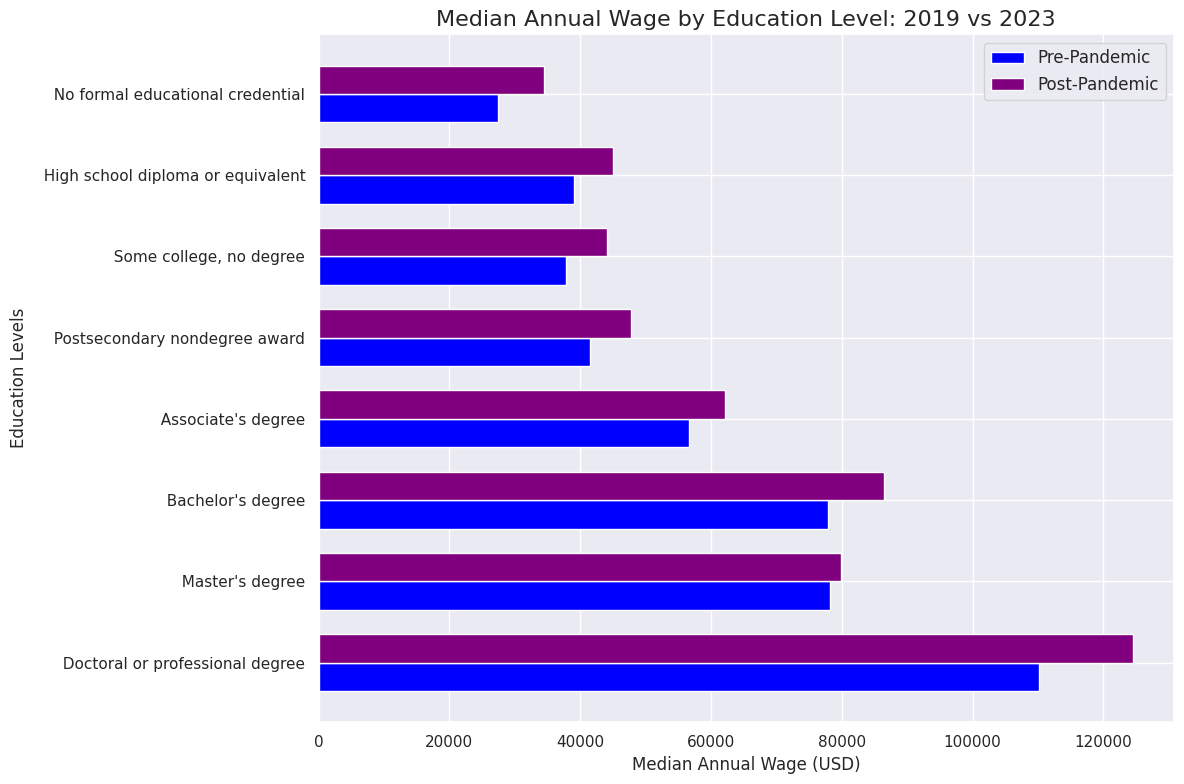

In [149]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

sns.set(style="darkgrid")

# Extract data from the DataFrames
education_levels = df_table_5_2b['Typical entry-level education']

# Ensure wage columns are numeric
median_wage_2019 = pd.to_numeric(df_table_5_2a['Median annual wage, 2020(1)'], errors='coerce')
median_wage_2023 = pd.to_numeric(df_table_5_2b['Median annual wage, dollars, 2023[1]'], errors='coerce')

# Set the width of the bars
bar_width = 0.35

# Set the positions of the bars on the x-axis
x_pos = np.arange(len(education_levels))
x_pos_2019 = x_pos - bar_width / 2
x_pos_2023 = x_pos + bar_width / 2

# Create the plot
plt.figure(figsize=(12, 8))

# Plot Median Annual Wage for 2019
plt.barh(x_pos_2019, median_wage_2019, bar_width, color='blue', label='Pre-Pandemic')

# Plot Median Annual Wage for 2023
plt.barh(x_pos_2023, median_wage_2023, bar_width, color='purple', label='Post-Pandemic')

# Customize the plot
plt.title("Median Annual Wage by Education Level: 2019 vs 2023", fontsize=16)
plt.xlabel("Median Annual Wage (USD)", fontsize=12)
plt.ylabel("Education Levels", fontsize=12)
plt.yticks(x_pos, education_levels)  # Set y-axis labels
plt.legend(loc='best', fontsize=12)  # Add a legend

# Show the plot
plt.tight_layout()
plt.show()


In [150]:
processTable(table_5_3_19)
processTable(table_5_3_23)

Table Title: Table 5.3 Educational attainment for workers 25 years and older by detailed occupation, 2019
Column Names:
['2019 National Employment Matrix title', '2019 National Employment Matrix code', 'Less than high school diploma', 'High school diploma or equivalent', 'Some college, no degree', "Associate's degree", "Bachelor's degree", "Master's degree", 'Doctoral or professional degree']
Table Title: Table 5.3 Educational attainment for workers 25 years and older by detailed occupation, 2021-22
Column Names:
['2023 National Employment Matrix title', '2023 National Employment Matrix code', 'Less than high school diploma', 'High school diploma or equivalent', 'Some college, no degree', "Associate's degree", "Bachelor's degree", "Master's degree", 'Doctoral or professional degree']


In [151]:
# Function to process and extract relevant rows for a specific title
def extract_total_occupation_data(sheet):
    for row in sheet.iter_rows(min_row=1, max_row=sheet.max_row, min_col=1, max_col=sheet.max_column):
        row_values = [cell.value for cell in row]
        # Look for the row with "Total, all occupations"
        if row_values[0] == "Total, all occupations":
            return row_values[2:]  # Return data starting from index 2 (excluding matrix code)

# Extracting data
total_occupation_data_19 = extract_total_occupation_data(table_5_3_19)
total_occupation_data_23 = extract_total_occupation_data(table_5_3_23)

# Education levels corresponding to the data
education_levels = [
    "Less than high school diploma",
    "High school diploma or equivalent",
    "Some college, no degree",
    "Associate's degree",
    "Bachelor's degree",
    "Master's degree",
    "Doctoral or professional degree",
]

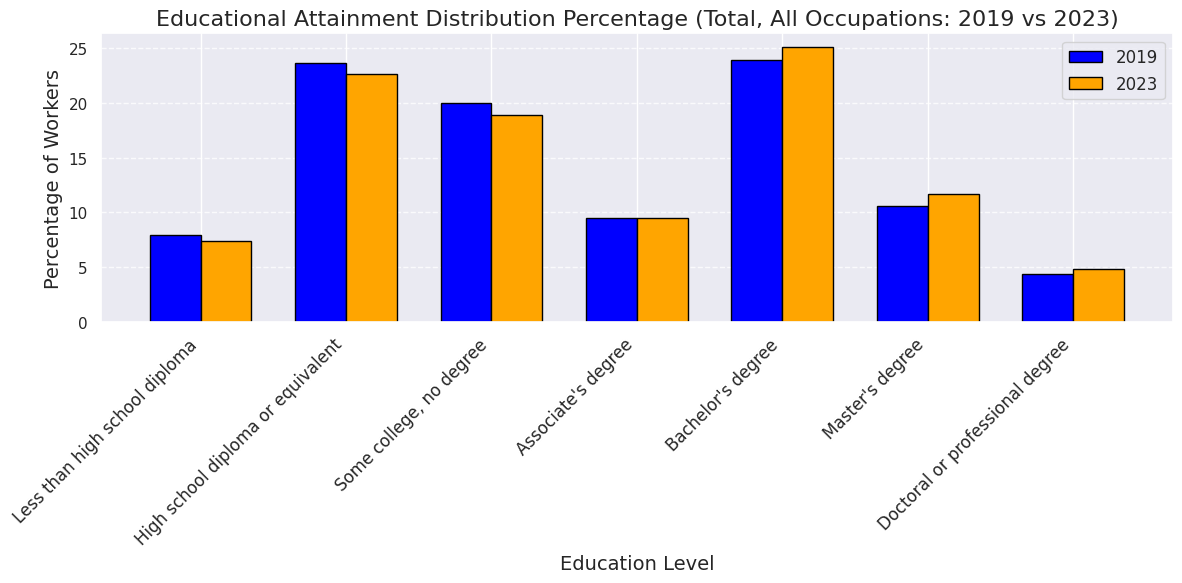

In [152]:
import numpy as np
import matplotlib.pyplot as plt

# Set the width of the bars
bar_width = 0.35

# Set the positions of the bars on the x-axis
x_pos = np.arange(len(education_levels))
x_pos_19 = x_pos - bar_width / 2
x_pos_23 = x_pos + bar_width / 2

# Create the plot
plt.figure(figsize=(12, 6))

# Plot 2019 data
plt.bar(x_pos_19, total_occupation_data_19, bar_width, color='blue', label='2019', edgecolor='black')

# Plot 2023 data
plt.bar(x_pos_23, total_occupation_data_23, bar_width, color='orange', label='2023', edgecolor='black')

# Add labels and title
plt.title("Educational Attainment Distribution Percentage (Total, All Occupations: 2019 vs 2023)", fontsize=16)
plt.xlabel("Education Level", fontsize=14)
plt.ylabel("Percentage of Workers", fontsize=14)
plt.xticks(x_pos, education_levels, rotation=45, ha='right', fontsize=12)  # Labels at 45 degrees
plt.legend(loc='best', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.8)
plt.tight_layout()

# Show the plot
plt.tight_layout()
plt.show()


In [153]:
processTable(table_5_4_19)
processTable(table_5_4_23)

Table Title: Table 5.4 Education and training assignments by detailed occupation, 2019
Column Names:
['2019 National Employment Matrix title', '2019 National Employment Matrix code', 'Typical education needed for entry', 'Work experience in a related occupation', 'Typical on-the-job training needed to attain competency in the occupation']
Table Title: Table 5.4 Education and training assignments by detailed occupation, 2023
Column Names:
['2023 National Employment Matrix title', '2023 National Employment Matrix code', 'Typical education needed for entry', 'Work experience in a related occupation', 'Typical on-the-job training needed to attain competency in the occupation', 'xlsx_ooh_link']


In [154]:
def extract_table5_4_data_(sheet):
    data = []
    for row in sheet.iter_rows(min_row=1, max_row=sheet.max_row, min_col=1, max_col=sheet.max_column):
        row_values = [cell.value for cell in row]
        # Skip metadata rows
        if (
            not row_values[0] or  # Skip rows with no label
            row_values[0].startswith("Table") or  # Skip title row
            row_values[0] in ("Footnotes:", "[1]") or  # Skip footnote rows
            row_values[0].startswith("Note:") or  # Skip notes
            row_values[0].startswith("Source:")  # Skip source
        ):
            continue
        # Ensure all data rows have meaningful values
        if row_values[1] is not None:
            data.append(row_values)
    return data

# Extract relevant data
data_table_5_4_19 = extract_table5_4_data_(table_5_4_19)
data_table_5_4_23 = extract_table5_4_data_(table_5_4_23)

In [155]:
columns4a = data_table_5_4_19[0]  # The first row contains column names
data4a = data_table_5_4_19[1:]    # The remaining rows are the actual data

columns4b = data_table_5_4_23[0]  # The first row contains column names
data4b = data_table_5_4_23[1:]    # The remaining rows are the actual data

df_table_5_4_19 = pd.DataFrame(data4a, columns=columns4a)
df_table_5_4_23 = pd.DataFrame(data4b, columns=columns4b)


In [156]:
df_table_5_4_19.drop('2019 National Employment Matrix code', axis=1)

,2019 National Employment Matrix title,Typical education needed for entry,Work experience in a related occupation,Typical on-the-job training needed to attain competency in the occupation
0,Chief executives,Bachelor's degree,5 years or more,None
1,General and operations managers,Bachelor's degree,5 years or more,None
2,Legislators,Bachelor's degree,Less than 5 years,None
3,Advertising and promotions managers,Bachelor's degree,Less than 5 years,None
4,Marketing managers,Bachelor's degree,5 years or more,None
...,...,...,...,...
785,"Pump operators, except wellhead pumpers",High school diploma or equivalent,None,Moderate-term on-the-job training
786,Wellhead pumpers,High school diploma or equivalent,Less than 5 years,Moderate-term on-the-job training
787,Refuse and recyclable material collectors,No formal educational credential,None,Short-term on-the-job training
788,"Tank car, truck, and ship loaders",No formal educational credential,None,Short-term on-the-job training


In [157]:
df_table_5_4_23.drop('xlsx_ooh_link', axis=1)
df_table_5_4_23.drop('2023 National Employment Matrix code', axis=1)

,2023 National Employment Matrix title,Typical education needed for entry,Work experience in a related occupation,Typical on-the-job training needed to attain competency in the occupation,xlsx_ooh_link
0,Chief executives,Bachelor's degree,5 years or more,None,OOH Content
1,General and operations managers,Bachelor's degree,5 years or more,None,OOH Content
2,Legislators,Bachelor's degree,Less than 5 years,None,—
3,Advertising and promotions managers,Bachelor's degree,Less than 5 years,None,OOH Content
4,Marketing managers,Bachelor's degree,5 years or more,None,OOH Content
...,...,...,...,...,...
827,"Pump operators, except wellhead pumpers",High school diploma or equivalent,None,Moderate-term on-the-job training,—
828,Wellhead pumpers,High school diploma or equivalent,Less than 5 years,Moderate-term on-the-job training,—
829,Refuse and recyclable material collectors,No formal educational credential,None,Short-term on-the-job training,OOH Content
830,"Tank car, truck, and ship loaders",No formal educational credential,None,Short-term on-the-job training,—


In [158]:
education_levels = [
    "Less than high school diploma",
    "High school diploma or equivalent",
    "Some college, no degree",
    "Associate's degree",
    "Bachelor's degree",
    "Master's degree",
    "Doctoral or professional degree",
]

# Value counts for pre- and post-pandemic data
education_counts_19 = df_table_5_4_19['Typical education needed for entry'].value_counts()
education_counts_23 = df_table_5_4_23['Typical education needed for entry'].value_counts()

# Reindex to ensure all levels are included in the specified order
education_counts_19 = education_counts_19.reindex(education_levels, fill_value=0)
education_counts_23 = education_counts_23.reindex(education_levels, fill_value=0)


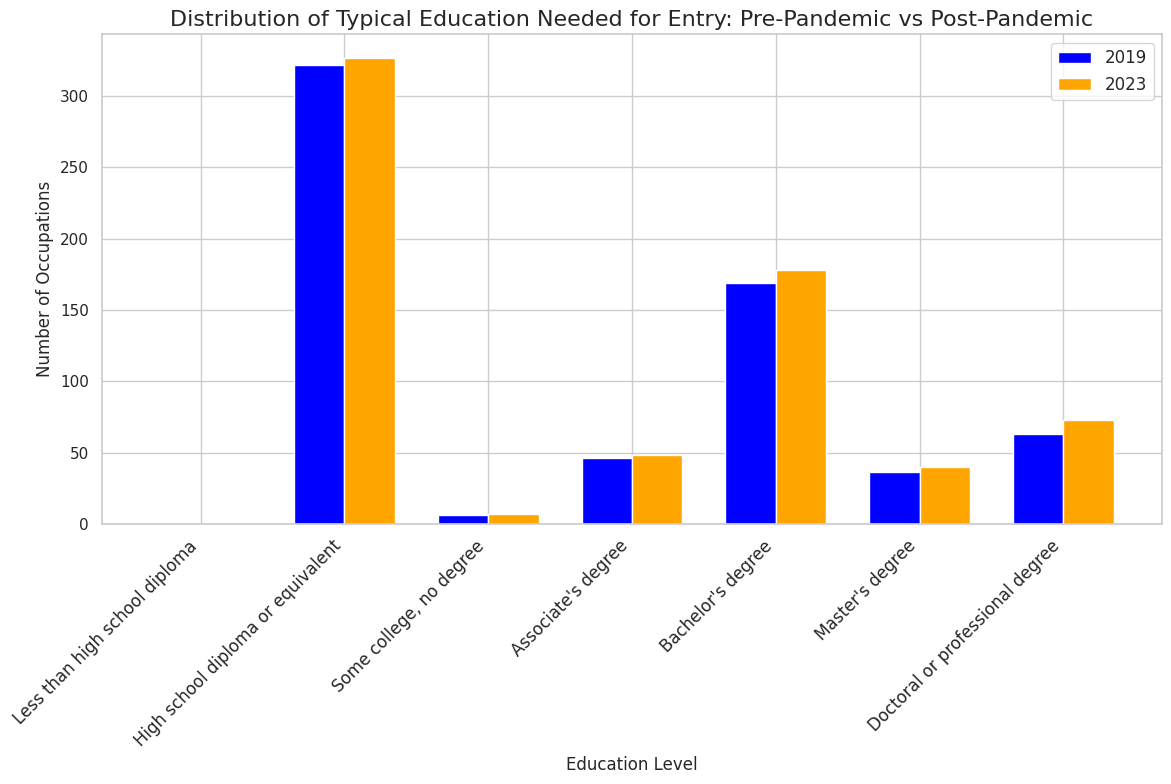

In [159]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

sns.set(style="whitegrid")

# Set the width of the bars
bar_width = 0.35

# Set the positions of the bars on the x-axis
x_pos = np.arange(len(education_levels))
x_pos_19 = x_pos - bar_width / 2
x_pos_23 = x_pos + bar_width / 2

# Create the plot
plt.figure(figsize=(12, 8))

# Plot pre-pandemic (2019) data
plt.bar(x_pos_19, education_counts_19.values, bar_width, color='blue', label='2019')

# Plot post-pandemic (2023) data
plt.bar(x_pos_23, education_counts_23.values, bar_width, color='orange', label='2023')

# Add labels and title
plt.title("Distribution of Typical Education Needed for Entry: Pre-Pandemic vs Post-Pandemic", fontsize=16)
plt.xlabel("Education Level", fontsize=12)
plt.ylabel("Number of Occupations", fontsize=12)
plt.xticks(x_pos, education_levels, rotation=45, ha="right", fontsize=12)
plt.legend(loc='best', fontsize=12)
plt.tight_layout()

# Show the plot
plt.show()


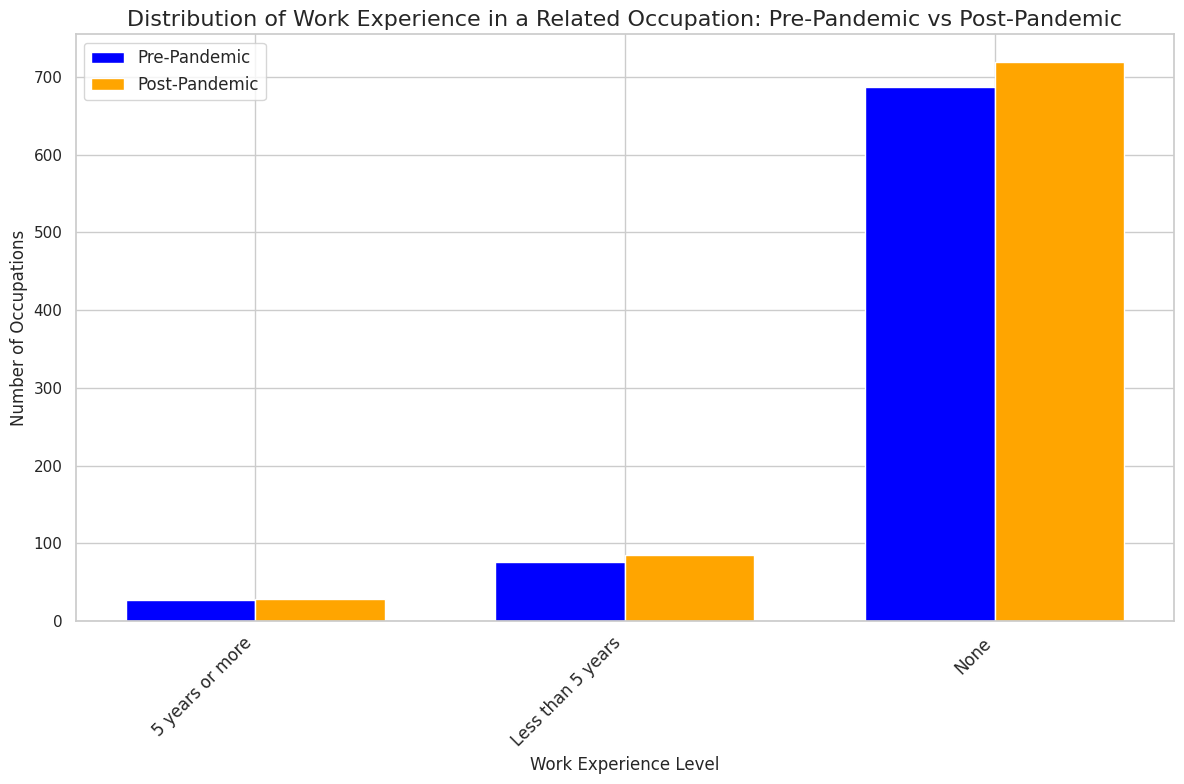

In [160]:
# Predefined work experience categories
work_exp = ['5 years or more',
            'Less than 5 years',
            'None']

# Extract value counts for work experience (pre- and post-pandemic)
work_counts_19 = df_table_5_4_19['Work experience in a related occupation'].value_counts()
work_counts_23 = df_table_5_4_23['Work experience in a related occupation'].value_counts()

# Reindex to ensure all categories are included
workexp_counts_19 = work_counts_19.reindex(work_exp, fill_value=0)
workexp_counts_23 = work_counts_23.reindex(work_exp, fill_value=0)

# Set the width of the bars
bar_width = 0.35

# Set the positions of the bars on the x-axis
x_pos = np.arange(len(work_exp))
x_pos_19 = x_pos - bar_width / 2
x_pos_23 = x_pos + bar_width / 2

# Create the plot
sns.set(style="whitegrid")
plt.figure(figsize=(12, 8))

# Plot pre-pandemic (2019) data
plt.bar(x_pos_19, workexp_counts_19.values, bar_width, color='blue', label='Pre-Pandemic')

# Plot post-pandemic (2023) data
plt.bar(x_pos_23, workexp_counts_23.values, bar_width, color='orange', label='Post-Pandemic')

# Add labels and title
plt.title("Distribution of Work Experience in a Related Occupation: Pre-Pandemic vs Post-Pandemic", fontsize=16)
plt.xlabel("Work Experience Level", fontsize=12)
plt.ylabel("Number of Occupations", fontsize=12)
plt.xticks(x_pos, work_exp, rotation=45, ha="right", fontsize=12)
plt.legend(loc='best', fontsize=12)
plt.tight_layout()

# Show the plot
plt.show()


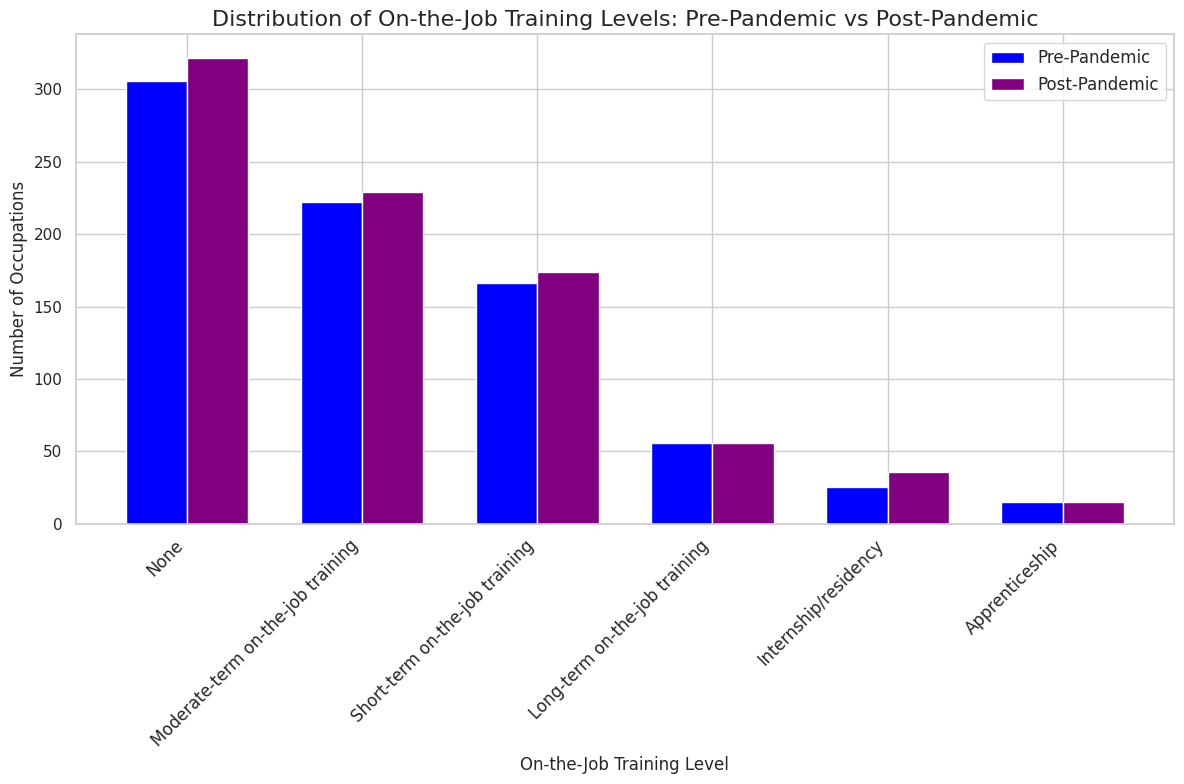

In [161]:
# Predefined training levels
training_levels = ['None',
                   'Moderate-term on-the-job training',
                   'Short-term on-the-job training',
                   'Long-term on-the-job training',
                   'Internship/residency',
                   'Apprenticeship']

# Extract value counts for on-the-job training (pre- and post-pandemic)
training_counts_19 = df_table_5_4_19['Typical on-the-job training needed to attain competency in the occupation'].value_counts()
training_counts_23 = df_table_5_4_23['Typical on-the-job training needed to attain competency in the occupation'].value_counts()

# Reindex to ensure all categories are included
training_counts_19 = training_counts_19.reindex(training_levels, fill_value=0)
training_counts_23 = training_counts_23.reindex(training_levels, fill_value=0)

# Set the width of the bars
bar_width = 0.35

# Set the positions of the bars on the x-axis
x_pos = np.arange(len(training_levels))
x_pos_19 = x_pos - bar_width / 2
x_pos_23 = x_pos + bar_width / 2

# Create the plot
sns.set(style="whitegrid")
plt.figure(figsize=(12, 8))

# Plot pre-pandemic (2019) data
plt.bar(x_pos_19, training_counts_19.values, bar_width, color='blue', label='Pre-Pandemic')

# Plot post-pandemic (2023) data
plt.bar(x_pos_23, training_counts_23.values, bar_width, color='purple', label='Post-Pandemic')

# Add labels and title
plt.title("Distribution of On-the-Job Training Levels: Pre-Pandemic vs Post-Pandemic", fontsize=16)
plt.xlabel("On-the-Job Training Level", fontsize=12)
plt.ylabel("Number of Occupations", fontsize=12)
plt.xticks(x_pos, training_levels, rotation=45, ha="right", fontsize=12)
plt.legend(loc='best', fontsize=12)
plt.tight_layout()

# Show the plot
plt.show()
